In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [3]:
df.head(5)

# test_df.head(5)

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


In [4]:
df.shape,test_df.shape

((630000, 13), (270000, 12))

In [5]:
df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                630000 non-null  int64  
 1   age               630000 non-null  int64  
 2   gender            630000 non-null  object 
 3   course            630000 non-null  object 
 4   study_hours       630000 non-null  float64
 5   class_attendance  630000 non-null  float64
 6   internet_access   630000 non-null  object 
 7   sleep_hours       630000 non-null  float64
 8   sleep_quality     630000 non-null  object 
 9   study_method      630000 non-null  object 
 10  facility_rating   630000 non-null  object 
 11  exam_difficulty   630000 non-null  object 
 12  exam_score        630000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 12 colum

(None, None)

In [6]:
df.isnull().sum(),test_df.isnull().sum()

## no any null values in any null values in train dataset and test dataset

(id                  0
 age                 0
 gender              0
 course              0
 study_hours         0
 class_attendance    0
 internet_access     0
 sleep_hours         0
 sleep_quality       0
 study_method        0
 facility_rating     0
 exam_difficulty     0
 exam_score          0
 dtype: int64,
 id                  0
 age                 0
 gender              0
 course              0
 study_hours         0
 class_attendance    0
 internet_access     0
 sleep_hours         0
 sleep_quality       0
 study_method        0
 facility_rating     0
 exam_difficulty     0
 dtype: int64)

In [7]:
df[df.duplicated()],test_df[test_df.duplicated()]

## no any duplicated values in train dataset and test dataset

(Empty DataFrame
 Columns: [id, age, gender, course, study_hours, class_attendance, internet_access, sleep_hours, sleep_quality, study_method, facility_rating, exam_difficulty, exam_score]
 Index: [],
 Empty DataFrame
 Columns: [id, age, gender, course, study_hours, class_attendance, internet_access, sleep_hours, sleep_quality, study_method, facility_rating, exam_difficulty]
 Index: [])

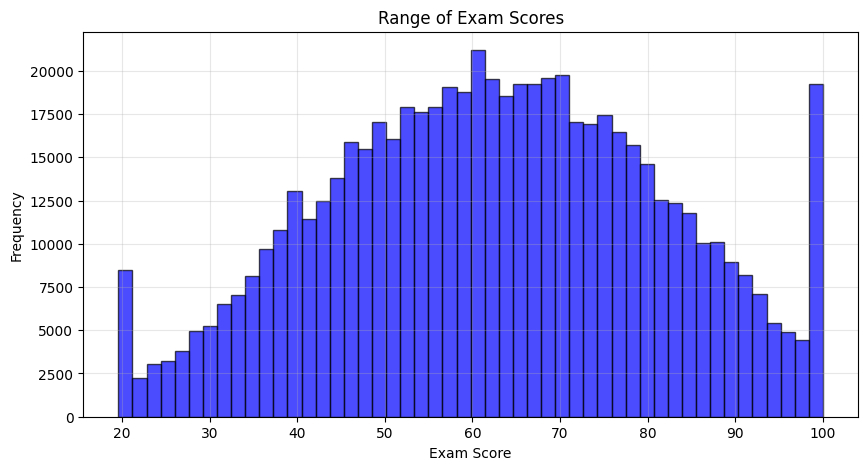

In [8]:
plt.figure(figsize=(10,5))
plt.hist(df['exam_score'],bins=50,alpha=0.7,edgecolor='black',color='blue')
plt.title("Range of Exam Scores")
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


## very much amount of student score 100 out of 100 
## conclusion


# Questions may have been straightforward OR

# Paper matched the syllabus very closely OR

# Evaluation was lenient 

In [9]:
print(df['exam_score'].min())
print(df['exam_score'].max())
print(df['exam_score'].std())
print(df['exam_score'].mean())
print(df['exam_score'].median())
print(df['exam_score'].std())

## from this our mean and median is almost same --> The difference is negligible →
#                                                    very balanced distribution

# No Strong Skewness

# Std = 18.9 is fairly large for a 0–100 scale

# This means:

# Scores are widely spread

# There is high variability

19.599
100.0
18.91688414632426
62.506672165079365
62.6
18.91688414632426


EDA


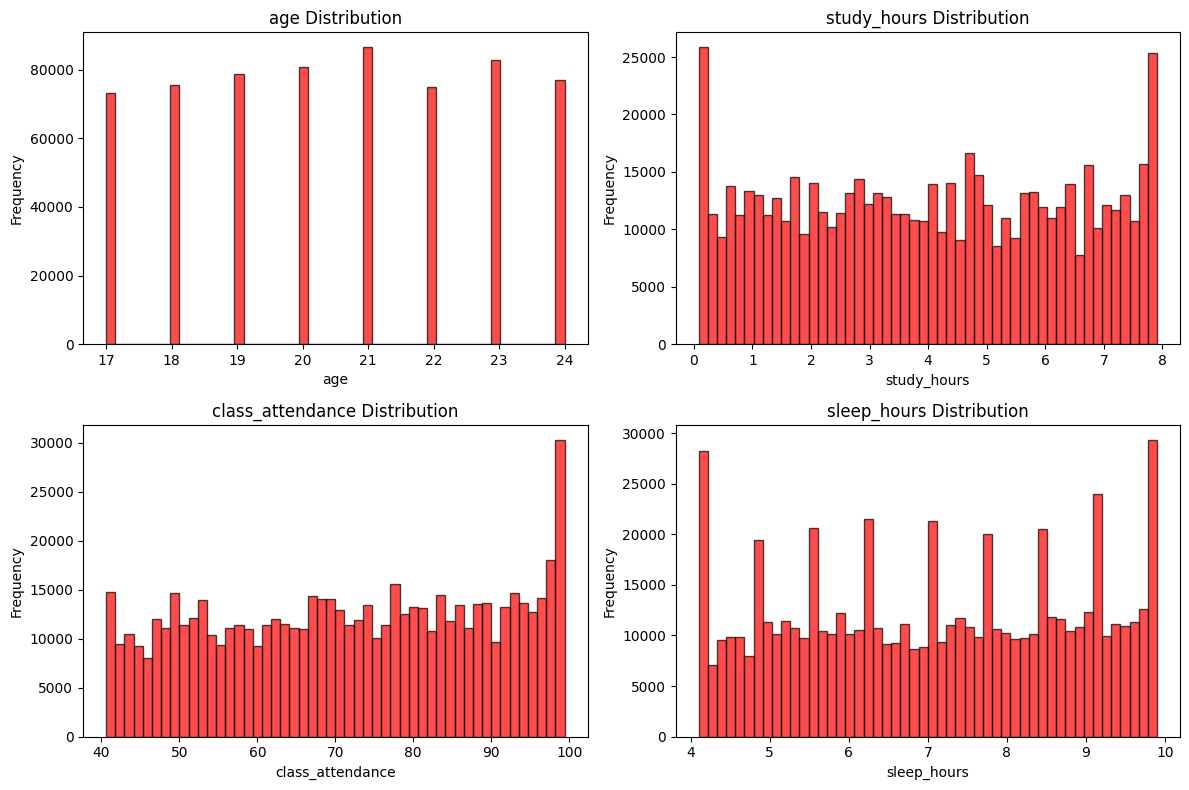

In [10]:
## numerical data 
numerical_cols = ['age', 'study_hours', 'class_attendance', 'sleep_hours']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=50, alpha=0.7, edgecolor='black',color = 'red')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

--- 2. Study Hours vs Exam Score ---


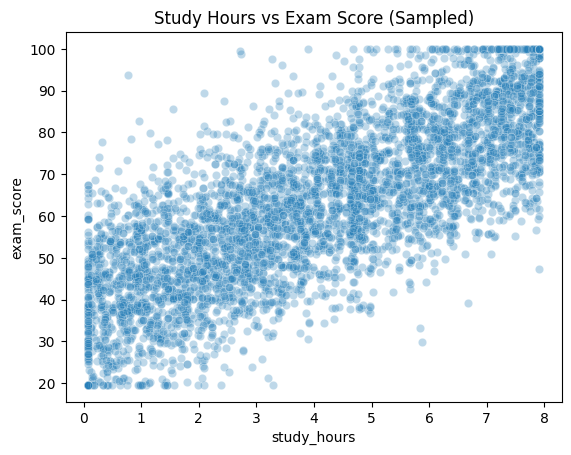

In [11]:
print("--- 2. Study Hours vs Exam Score ---")

sample_df=df.sample(5000,random_state=42)

plt.Figure(figsize=(10,5))
sns.scatterplot(
    data=sample_df,
    x='study_hours',
    y='exam_score',
    alpha=0.3,
    color='#2980b9'
)

plt.title("Study Hours vs Exam Score (Sampled)")
plt.show()


##The scatter plot indicates a clear positive and approximately linear relationship between 
# study hours  and exam score. While increased study time is associated with higher scores, 
# the substantial variability suggests that study hours alone do not fully determine exam performance.


# Students with the same study hours still have very different scores

# Other factors (IQ, prior knowledge, teaching quality, exam difficulty, stress, luck) also matter

--- 3. Class Attendence vs Exam Score ---


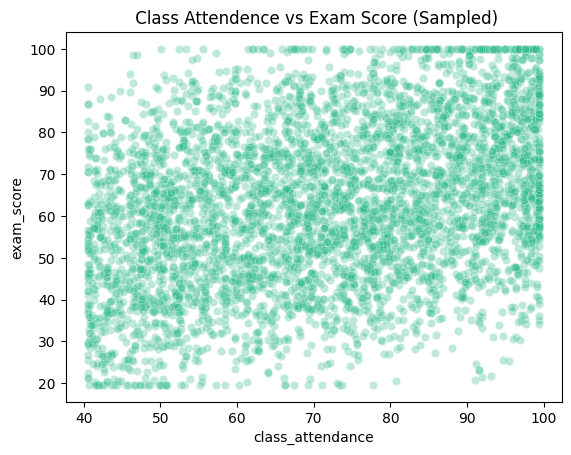

In [12]:
print("--- 3. Class Attendence vs Exam Score ---")

sample_df=df.sample(5000,random_state=42)

plt.Figure(figsize=(10,5))
sns.scatterplot(
    data=sample_df,
    x='class_attendance',
    y='exam_score',
    alpha=0.3,
    color="#29b987"
)

plt.title(" Class Attendence vs Exam Score (Sampled)")
plt.show()


##he scatter plot suggests a weak association between class attendance and exam scores. 
# The large variability in scores across all attendance levels indicates that attendance alone does not 
# strongly influence exam performance.

--- 3. Sleep Hour vs Exam Score ---


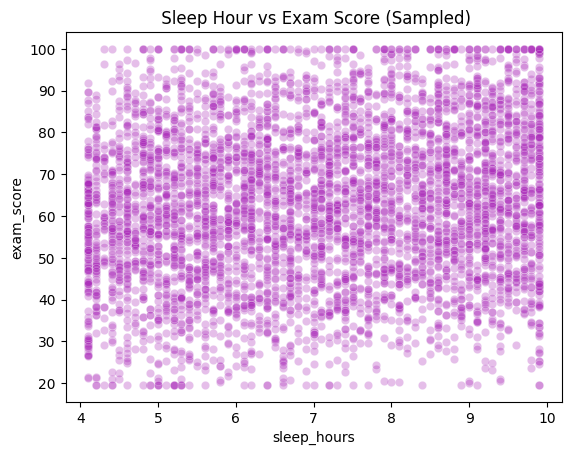

In [13]:
print("--- 3. Sleep Hour vs Exam Score ---")

sample_df=df.sample(5000,random_state=42)

plt.Figure(figsize=(10,5))
sns.scatterplot(
    data=sample_df,
    x='sleep_hours',
    y='exam_score',
    alpha=0.3,
    color="#aa29b9"
)

plt.title(" Sleep Hour vs Exam Score (Sampled)")
plt.show()


##For every sleep value, scores range from very low to very high
# The cloud is almost uniform vertically


# Too little sleep → harmful
# Enough sleep → doesn’t guarantee high marks
# Other factors (study hours, ability, stress) dominate


--- 4. Study Hours vs Exam Score ---


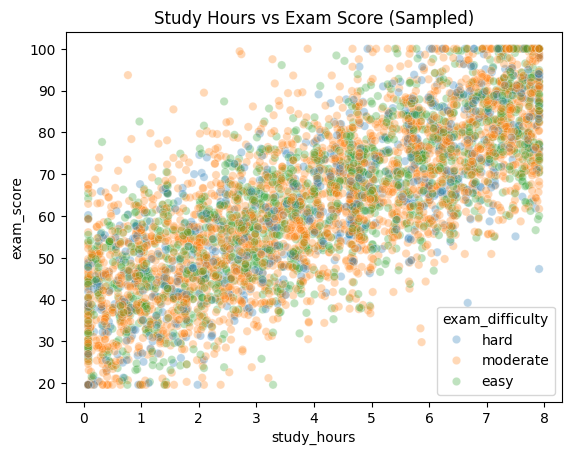

In [14]:
print("--- 4. Study Hours vs Exam Score ---")

sample_df=df.sample(5000,random_state=42)

plt.Figure(figsize=(10,5))
sns.scatterplot(
    data=sample_df,
    x='study_hours',
    y='exam_score',
    hue='exam_difficulty',
    alpha=0.3,
    color='#2980b9'
)

plt.title("Study Hours vs Exam Score (Sampled)")
plt.show()


## Easy Exam --> Generally Higher Score
##Moderate exams → scores in the middle
# Hard exams → generally lower scores

# Difficulty does not dominate performance — preparation does.

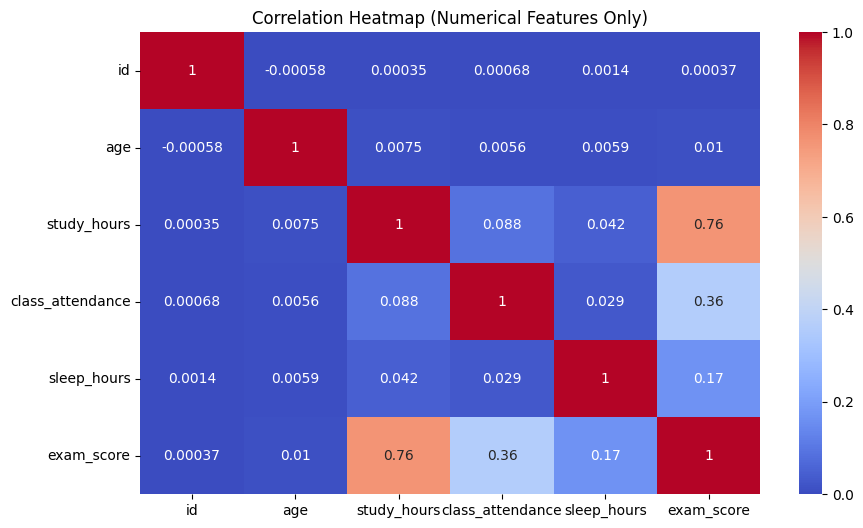

In [15]:
# Select only numerical columns
numeric_df = df.select_dtypes(include='number')

# Create correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

FINAL EDA CONCLUSION FOR NUMRICAL FEATURE

Exploratory Data Analysis (EDA) reveals that study hours have a strong positive relationship with exam scores, indicating that increased study time significantly improves academic performance. Class attendance exhibits a weak association with exam scores, suggesting it is not a strong standalone predictor. Sleep hours show a very weak and non-linear relationship with exam performance, implying that adequate sleep is necessary but not sufficient to achieve higher scores. Overall, study hours emerge as the most influential factor affecting exam outcomes.

EDA ON CATEGORICAL FEATURE


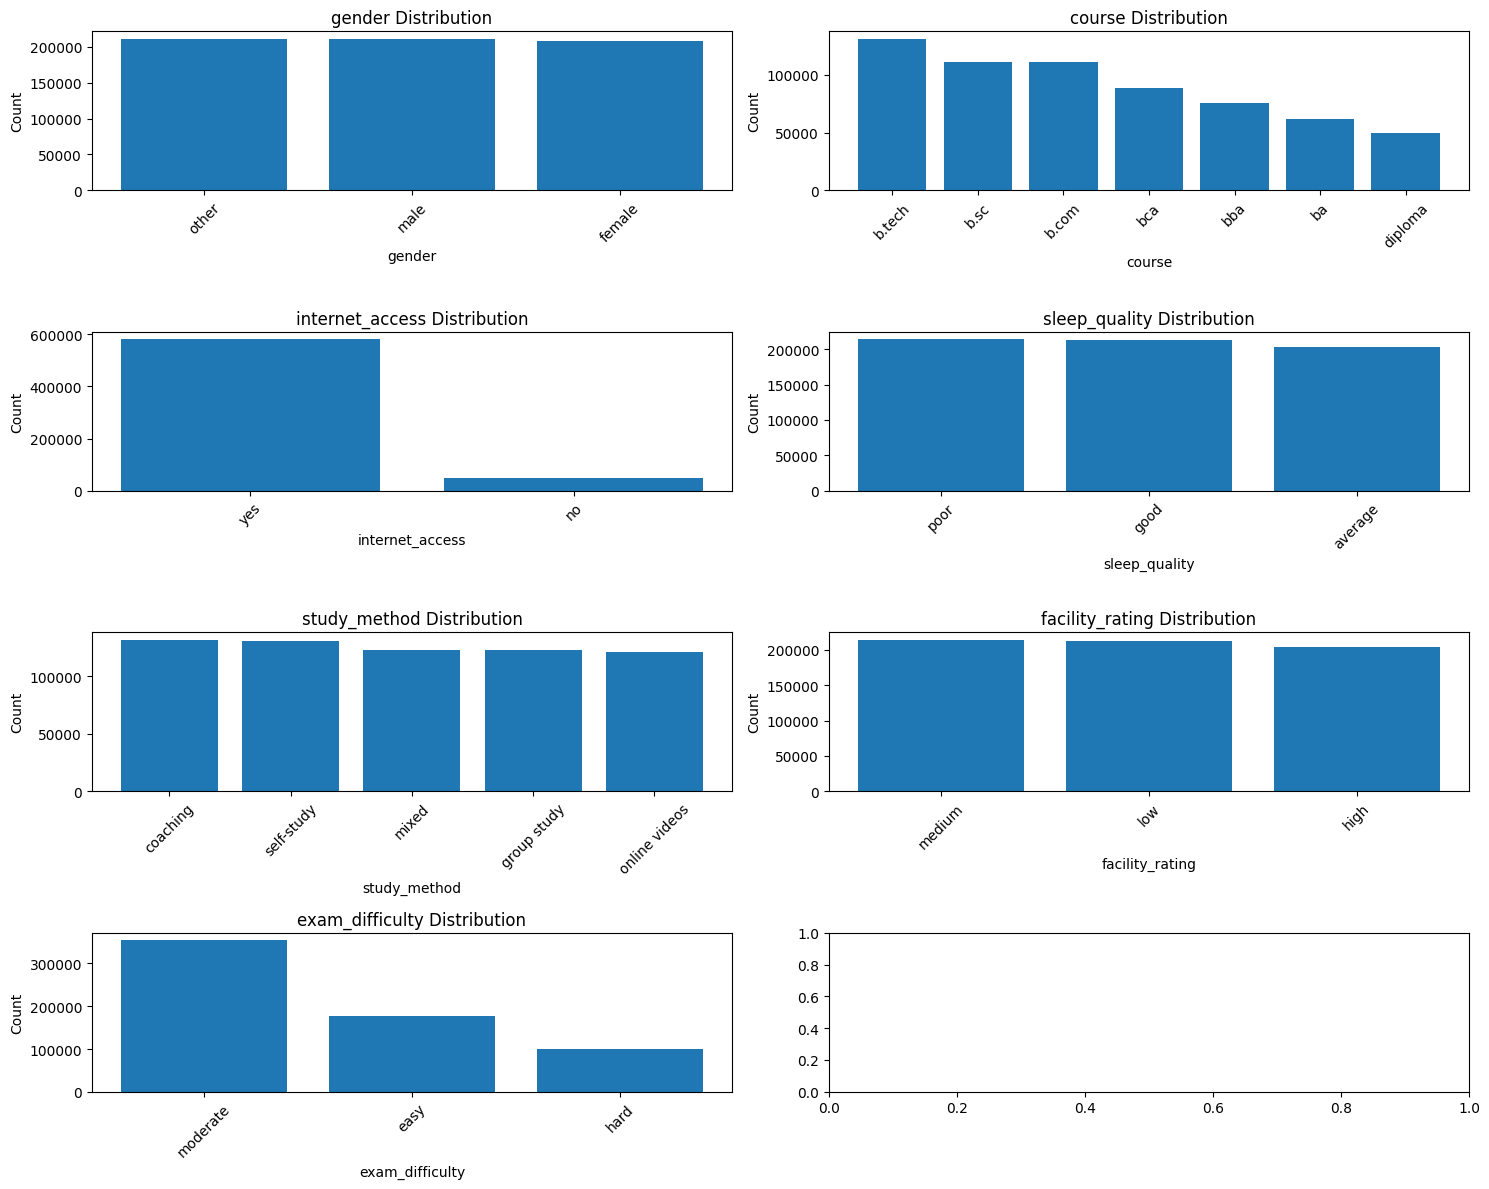

In [16]:
categorical_cols = ['gender', 'course', 'internet_access', 'sleep_quality', 
                    'study_method', 'facility_rating', 'exam_difficulty']

fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [18]:
df.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27308\2129888094.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27308\2129888094.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27308\2129888094.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27308\2129888094.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

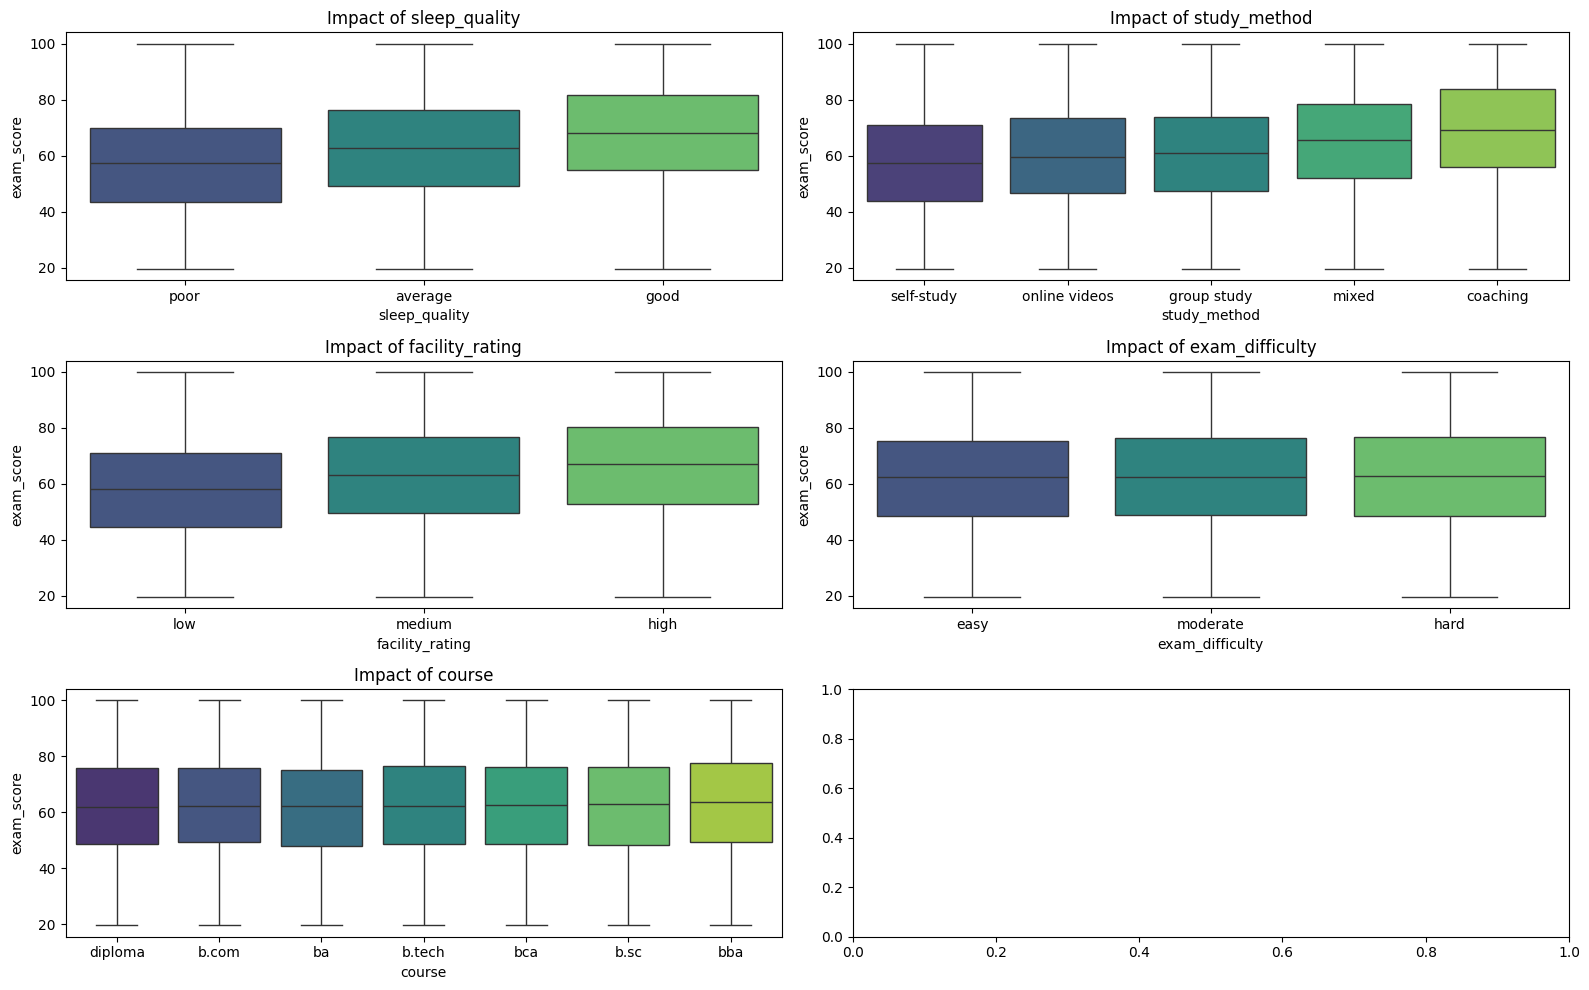

In [19]:
cat_cols=['sleep_quality','study_method','facility_rating','exam_difficulty','course']

fig, axes = plt.subplots(3, 2, figsize=(16, 10))
axes = axes.flatten()


for i,col in enumerate(cat_cols):
    order=(
        df.groupby(col)['exam_score']
        .median()
        .sort_values()
        .index
    )

    sns.boxplot(
        data=df,
        x=col,
        y='exam_score',
        order=order,
        ax=axes[i],
        palette='viridis',
    )
    axes[i].set_title(f"Impact of {col}")

plt.tight_layout()
plt.show()

FINAL EDA CONCLUSION FOR CATEGORICAL FEATURE

better sleep quality is associated with higher exam scores.

Study method significantly influences exam scores, with structured methods tending to perform better.

Better facilities are associated with improved academic performance.

Exam difficulty shows a weak effect on exam scores

Course type has minimal influence on exam scores.

Feature Engineering 

In [30]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

# ----------------------------------
# 1. Drop ID column (if exists)
# ----------------------------------
df_model = df.drop(columns=['id','age','internet_access'], errors='ignore')

# ----------------------------------
# 2. Convert yes/no → 0/1 (IMPORTANT FIX)
# ----------------------------------
binary_cols = df_model.select_dtypes(include='object').columns

df_model[binary_cols] = df_model[binary_cols].replace({
    'yes': 1,
    'no': 0
})

# ----------------------------------
# 3. Define feature groups
# ----------------------------------
nominal_features = ['gender', 'course', 'study_method']

ordinal_features = ['sleep_quality', 'facility_rating', 'exam_difficulty']

numerical_features = [
    col for col in df_model.columns
    if col not in nominal_features + ordinal_features + ['exam_score']
]

# ----------------------------------
# 4. Define encoders
# ----------------------------------
ordinal_encoder = OrdinalEncoder(
    categories=[
        ['poor', 'average', 'good'],      # sleep_quality
        ['low', 'medium', 'high'],        # facility_rating
        ['easy', 'moderate', 'hard']      # exam_difficulty
    ]
)

onehot_encoder = OneHotEncoder(
    drop='first',
    handle_unknown='ignore',
    sparse_output=False
)

# ----------------------------------
# 5. Column Transformer
# ----------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ordinal_features),
        ('nominal', onehot_encoder, nominal_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# ----------------------------------
# 6. Split features & target
# ----------------------------------
X = df_model.drop(columns=['exam_score'])
y = df_model['exam_score']

# ----------------------------------
# 7. Train-test split
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ----------------------------------
# 8. Apply preprocessing
# ----------------------------------
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# ----------------------------------
# 9. Output
# ----------------------------------
print("Feature engineering completed successfully ✅")
print("Train shape:", X_train_transformed.shape)
print("Test shape:", X_test_transformed.shape)
print("Sample transformed row:")
print(X_train_transformed[0])


Feature engineering completed successfully ✅
Train shape: (504000, 18)
Test shape: (126000, 18)
Sample transformed row:
[ 2.    0.    2.    0.    1.    0.    0.    0.    0.    0.    0.    0.
  1.    0.    0.    0.84 79.    9.9 ]


In [31]:
X_train_transformed[:5]


array([[ 2.  ,  0.  ,  2.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.84, 79.  ,  9.9 ],
       [ 2.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  3.35, 94.2 ,  6.  ],
       [ 2.  ,  2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  2.2 , 87.5 ,  6.8 ],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  3.1 , 64.  ,  7.6 ],
       [ 1.  ,  1.  ,  2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  1.  ,  0.  ,  0.  ,  1.  ,  0.  ,  1.44, 56.2 ,  5.5 ]])

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:
## Beginning Model Training
models = {
    # "Linear Regression": LinearRegression(),
    # "Lasso": Lasso(),
    # "Ridge": Ridge(),
    # "K-Neighbors Regressor": KNeighborsRegressor(),
    # "Decision Tree": DecisionTreeRegressor(),
    # "Random Forest Regressor": RandomForestRegressor(),
    # "Adaboost Regressor":AdaBoostRegressor(),
    # "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 8.6767
- Mean Absolute Error: 6.9187
- R2 Score: 0.7899
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.8110
- Mean Absolute Error: 7.0234
- R2 Score: 0.7817




In [ ]:
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping

# -------------------------------
# XGBoost Model
# -------------------------------
model = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.35,
    min_child_weight=5,
    objective="reg:squarederror",
    eval_metric="rmse",
    tree_method="hist",
    random_state=42,
    n_jobs=-1
)

# -------------------------------
# Train with Early Stopping (NEW API)
# -------------------------------
# model.fit(
#     X_train_transformed,
#     y_train,
#     eval_set=[(X_test_transformed, y_test)],
#     callbacks=[EarlyStopping(rounds=100)],
#     verbose=False
# )
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_transformed, y_train) # Train model
# -------------------------------
# Predictions
# -------------------------------
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

# -------------------------------
# Evaluation
# -------------------------------
train_mae, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
test_mae, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)

print("XGBoost Regressor")
print("Model performance for Training set")
print(f"- Root Mean Squared Error: {train_rmse:.4f}")
print(f"- Mean Absolute Error: {train_mae:.4f}")
print(f"- R2 Score: {train_r2:.4f}")

print("----------------------------------")

print("Model performance for Test set")
print(f"- Root Mean Squared Error: {test_rmse:.4f}")
print(f"- Mean Absolute Error: {test_mae:.4f}")
print(f"- R2 Score: {test_r2:.4f}")

print("=" * 35)


XGBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 8.6767
- Mean Absolute Error: 6.9187
- R2 Score: 0.7899
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.8110
- Mean Absolute Error: 7.0234
- R2 Score: 0.7817
